In [21]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Advertising Budget and Sales.csv")
df.head()


,index,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
df.isnull().sum()

index                      0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [23]:
#Sửa tên + xoá cột
df = df.iloc[: ,1:] #Xoá mất cột index
df = df.rename(
    columns= {
        "TV Ad Budget ($)":"TV",
        "Radio Ad Budget ($)": "Radio",
        "Newspaper Ad Budget ($)": "Newspaper",
        "Sales ($)":"Sales",
    }
)

In [24]:
#Tính độ tương quan
corr_TV = df["Sales"].corr(df["TV"])
corr_TV

np.float64(0.7822244248616066)

In [25]:
corr_newspaper = df["Sales"].corr(df["Newspaper"])
corr_newspaper

np.float64(0.22829902637616534)

In [26]:
corr_radio = df["Sales"].corr(df["Radio"])
corr_radio

np.float64(0.5762225745710552)

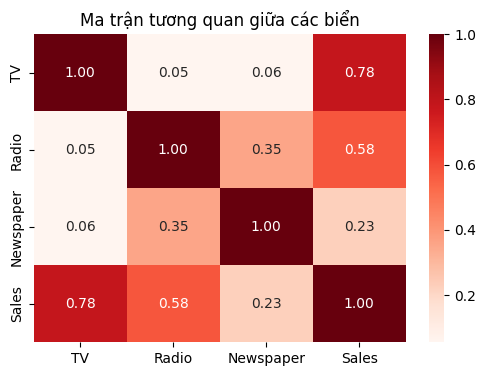

In [27]:
#Về bảng tương quan (heatmap)
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Ma trận tương quan giữa các biển")
plt.show()

In [28]:
#Tạo mô hình
model = LinearRegression()
X = df[["TV"]] #Const
y = df["Sales"] #Variable
model.fit(X,y)

model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
#Tạo dựng hồi quy (dự đoán)
y_pred = model.predict(X)

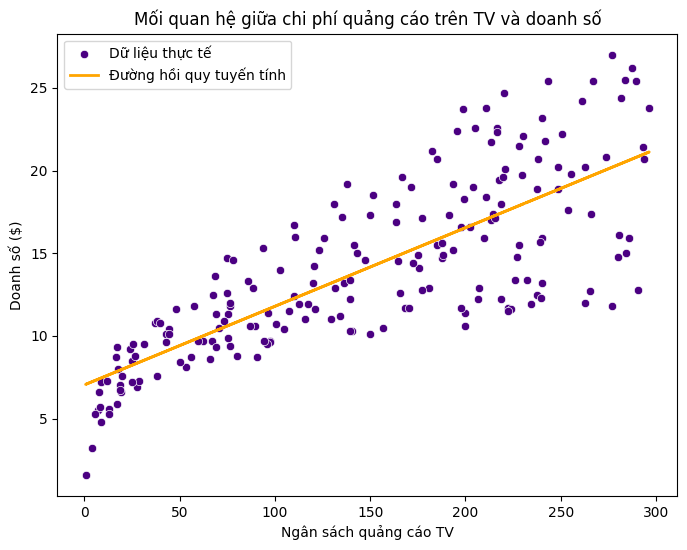

In [30]:
#Vẽ biểu đồ hồi quy
plt.figure(figsize=(8,6))
sns.scatterplot(x = X["TV"], y=y, color="indigo", label="Dữ liệu thực tế")
plt.plot(X["TV"], y_pred, color="orange", linewidth=2, label="Đường hồi quy tuyến tính")

plt.title("Mối quan hệ giữa chi phí quảng cáo trên TV và doanh số")
plt.xlabel("Ngân sách quảng cáo TV")
plt.ylabel("Doanh số ($)")
plt.legend()
plt.show()

In [31]:
# --- In thông tin mô hình ---
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Hệ số chặn (intercept):", model.intercept_)
print(f"Phương trình: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} * TV")

Hệ số hồi quy (slope): 0.04753664043301975
Hệ số chặn (intercept): 7.032593549127695
Phương trình: Sales = 7.03 + 0.05 * TV
